In [202]:
import pandas as pb
import warnings
warnings.filterwarnings("ignore")

In [203]:
df = pb.read_csv("./day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


now we have to do
1. null value treatment
2. outlier treatment
3. continous to categorial and categorial to continous

In [204]:
df.isna().sum()  ## Checks for a null value

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [205]:
## Outlier treatment can be done by ploting a box plot

import seaborn as sns
import matplotlib.pyplot as plt 

<Axes: >

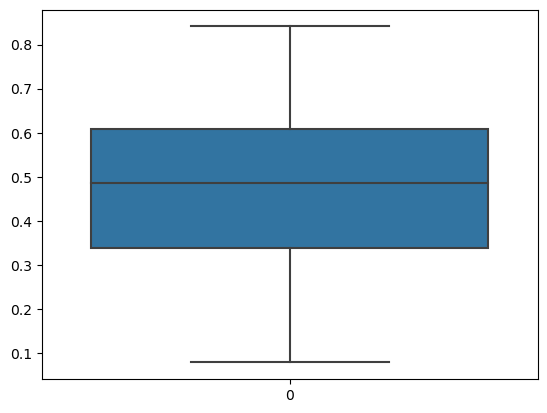

In [206]:
sns.boxplot(df.atemp)

{'whiskers': [<matplotlib.lines.Line2D at 0x1f7fa4cb350>,
 'caps': [<matplotlib.lines.Line2D at 0x1f7fa4dc990>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f7fa4ca810>],
 'medians': [<matplotlib.lines.Line2D at 0x1f7fa4dddd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f7f91be8d0>],
 'means': []}

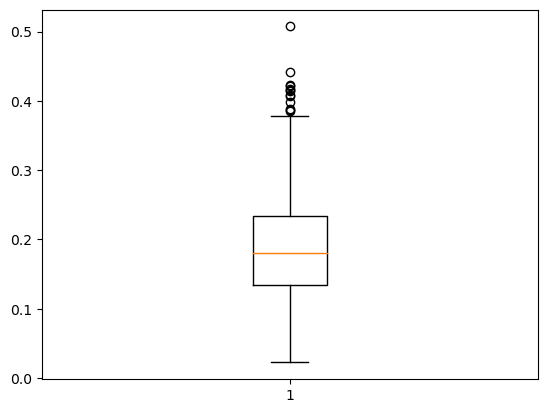

In [207]:
plt.boxplot(df.windspeed)

In [208]:
df[df.windspeed > 0.5]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
49,50,2011-02-19,1,0,2,0,6,0,1,0.399167,0.391404,0.187917,0.507463,532,1103,1635


In [209]:
df1 = pb.read_csv("./hour.csv")

In [210]:
df1.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


weathersit : 

		1: Clear, Few clouds, Partly cloudy, Partly cloudy
		
		2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		
		3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		
		4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [211]:
## Data Preparation
## Continous(numerical) too categorial
weat = {1: "Clear, Few clouds, Partly cloudy, Partly cloudy",
        2: "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",
        3: "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",
        4: "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"}

df.weathersit = df.weathersit.apply(lambda x: weat[x])
df1.weathersit = df1.weathersit.apply(lambda x: weat[x])


In [212]:
df1

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.26,0.2727,0.56,0.1343,13,48,61


In [213]:
## Data Preparation
## Continous(numerical) to categorial
days = {0: "sunday", 1: "monday",2: "tuesday", 3: "wednesday",4: "thrusday", 5: "firday",6: "saturday"}
df.weekday = df.weekday.apply(lambda x : days[x])
df1.weekday = df1.weekday.apply(lambda x: days[x])

In [214]:
df1

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,saturday,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,saturday,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,saturday,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,saturday,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,saturday,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,monday,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,monday,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,monday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,monday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.26,0.2727,0.56,0.1343,13,48,61


In [215]:
## Data Preparation
## Continous(numerical) to categorial
seas = {1:"spring", 2:"summer", 3:"fall", 4:"winter"}
df.season = df.season.apply(lambda x: seas[x])
df1.season = df1.season.apply(lambda x: seas[x])

In [216]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,1,0,saturday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,0,1,0,sunday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,0,1,0,monday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,0,1,0,tuesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,0,1,0,wednesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [217]:
##df1.head()

In [218]:
## this makes a new df consisting of only numeric cols so there are no errors in df.corr()
## made this numeric df just to see and learn the hotmap of correlation
numeric_df = df.select_dtypes(include=[float, int])

<Axes: >

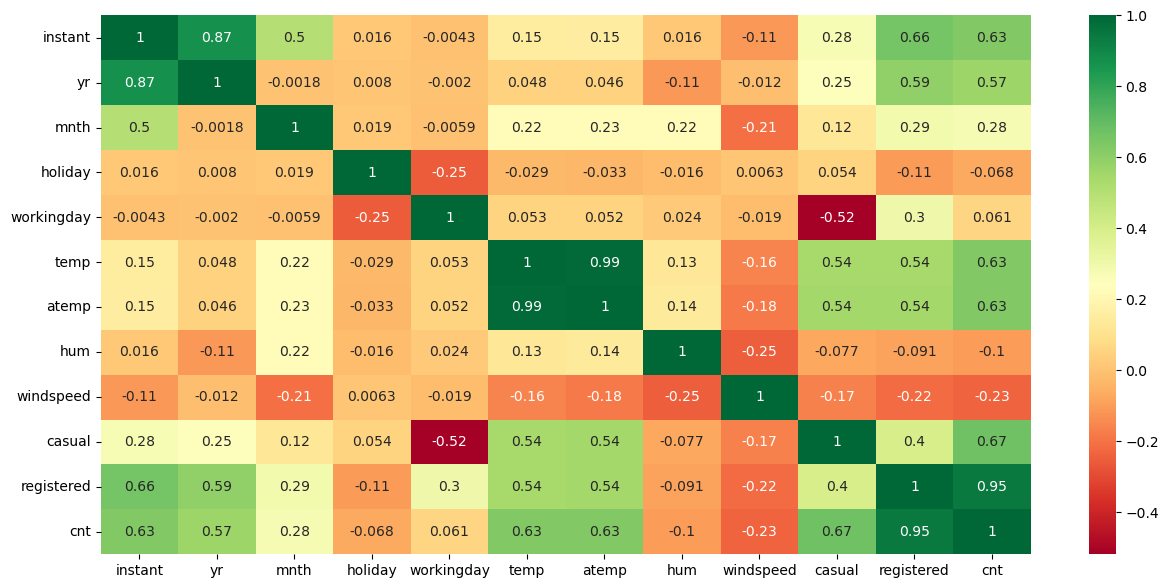

In [219]:
plt.figure(figsize=(15, 7))
sns.heatmap(numeric_df.corr(), annot= True, cmap="RdYlGn")

In [220]:
##sns.pairplot(data=df)
## this is pairplot it is a plotting but it takes a lot of time so i commented it out

In [221]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,1,0,saturday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,0,1,0,sunday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,0,1,0,monday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,0,1,0,tuesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,0,1,0,wednesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.226957,0.229270,0.436957,0.186900,82,1518,1600


From here, encoding starts

In [222]:
## Dummy encoding using one hot also
df= pb.concat([df, pb.get_dummies(df.season, drop_first=True)], axis=1)
df.drop(columns="season", inplace=True)

In [223]:
## Dummy encoding using one hot also
df = pb.concat([df, pb.get_dummies(df.weekday, drop_first=True)], axis=1)
df.drop(columns="weekday", inplace=True)

In [224]:
## Dummy encoding using one hot also
df = pb.concat([df, pb.get_dummies(df.weathersit, drop_first=True)], axis=1)
df.drop(columns="weathersit", inplace=True)

In [225]:
## Data Preparation
## Continous(numerical) to categorial
mnt = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec", }
df.mnth = df.mnth.apply(lambda x: mnt[x])

In [226]:
## Dummy encoding using one hot also
df =  pb.concat([df, pb.get_dummies(df.mnth, drop_first=True)], axis=1)
df.drop(columns="mnth", inplace=True)

In [227]:
## changed all boolean to numeric so that i can use linear regression on that (simply converts False to 0 and True to 1)
df[df.select_dtypes(include=['bool']).columns] = df.select_dtypes(include=['bool']).astype(int)

In [228]:
df.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1,2011-01-01,0,0,0,0.344167,0.363625,0.805833,0.160446,331,...,0,0,1,0,0,0,0,0,0,0
1,2,2011-01-02,0,0,0,0.363478,0.353739,0.696087,0.248539,131,...,0,0,1,0,0,0,0,0,0,0
2,3,2011-01-03,0,0,1,0.196364,0.189405,0.437273,0.248309,120,...,0,0,1,0,0,0,0,0,0,0
3,4,2011-01-04,0,0,1,0.200000,0.212122,0.590435,0.160296,108,...,0,0,1,0,0,0,0,0,0,0
4,5,2011-01-05,0,0,1,0.226957,0.229270,0.436957,0.186900,82,...,0,0,1,0,0,0,0,0,0,0


From here, the model making starts

In [229]:
from sklearn.model_selection import train_test_split
import sklearn as sks
import statsmodels.api as sm
from statsmodels.api import add_constant
from statsmodels.api import regression
from sklearn.preprocessing import MinMaxScaler

In [230]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vf

In [231]:
from sklearn.metrics import r2_score

In [232]:
##spliting the train test datas
df_train, df_test = train_test_split(df, test_size=0.2, random_state=120)

In [233]:
col = df_train.columns
col

Index(['instant', 'dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'casual', 'registered', 'cnt', 'spring', 'summer',
       'winter', 'monday', 'saturday', 'sunday', 'thrusday', 'tuesday',
       'wednesday',
       'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', 'Aug',
       'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'],
      dtype='object')

In [234]:
## removes cnt from df_train and assigns cnt to y_train(y_train onlly consists of cnt which is to be predicted)
y_train = df_train.pop("cnt")

## now cnt is removed from col as well
col = df_train.columns

In [235]:
##assigns all columns except cnt to X_train
X_train = df_train

##sm.add_constant` ensures that your linear regression model includes an intercept term, making your model more flexible and likely more accurate. 
## Without this, the model would assume the regression line passes through the origin (0,0), which is often not the case.
X_train_sm = sm.add_constant(X_train)

In [236]:
## y_train.values converts the pandas Series y_train to a NumPy array.
y_train = y_train.values

In [237]:
X_train_sm.drop(columns="dteday", inplace=True)
df_test.drop(columns="dteday", inplace=True)

Here we are doing the data prepration manually then we will do the same by automating the task using Scikit learn

Model Diagnostics / Model Validation

In [238]:
##OLS is a linear regression algorithm of statsmodel


## sm.OLS creates an OLS regression model object.
## y_train is your target variable (converted to a NumPy array).
## X_train_sm is your feature set with an added constant (intercept).
lr = sm.OLS(y_train, X_train_sm)

## lr_model = lr.fit() takes the model object lr and fits it to the training data (X_train_sm and y_train).
## During this fitting process, the method computes the parameters (intercept and slopes) that best explain the relationship between X_train_sm (features) and y_train (target).
lr_model = lr.fit()

## gives the summary of the model
lr_model.summary()

## R Squared tells us about how good the independent variables predict the dependent variable
## Here the R Squared is 1 which means the model is overfed and it learned all the patterns that it was given which is not good as it does not makes any mistakes
## when this model will be ran on actual data its accuracy will be very low
## so we have to do Data Validation to decrease its value
## it can be done by correcting the p values and vif of columns
## high R squared value is good but 1 is not good

##Here the P values(P>[t]) are the ones causing the problems they are basically errors and are decreasing the accuracy of the model
## P values tells us how important the coefficient of a variable is
## lower P value means it imoportant (less than 0.5)
## higher P value  means it is not so important (more than 0.5)
## delete the columns with 1 or near to 1 P values.

##Multicolinearity
## Here the independent variables makes relation with each other and that is not good
## this happens when two independent variables provide very similar information so one of them is useless to include in the data
## so we remove columns with high p values 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.241e+30
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        22:02:45   Log-Likelihood:                 14425.
No. Observations:                 584   AIC:                        -2.879e+04
Df Residuals:                     552   BIC:                        -2.865e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                    4.093e-12   2.71e-12      1.508      0.132   -1.24e-12    9.42e-12
instant                                                                                 -8.882e-15   2.27e-14     -0.392      0.695   -5.34e-14    3.56e-14
yr                                                                                      -1.819e-12   8.35e-12     -0.218      0.828   -1.82e-11    1.46e-11
holiday                                                                                  1.592e-12   1.21e-12      1.315      0.189   -7.87e-13    3.97e-12
workingday                                                                               3.411e-13   9.05e-13      0.377      0.706   -1.44e-12    2.12e-12
temp                                                                                     2.728e-12   8.94e-12      0.305      0.760   -1.48e-11    2.03e-11
atemp                                                                                   -6.366e-12   9.21e-12     -0.692      0.490   -2.44e-11    1.17e-11
hum                                                                                     -1.819e-12   2.01e-12     -0.904      0.366   -5.77e-12    2.13e-12
windspeed                                                                                1.023e-12   2.83e-12      0.361      0.718   -4.54e-12    6.59e-12
casual                                                                                      1.0000   6.02e-16   1.66e+15      0.000       1.000       1.000
registered                                                                                  1.0000   3.28e-16   3.05e+15      0.000       1.000       1.000
spring                                                                                  -1.819e-12    1.5e-12     -1.214      0.225   -4.76e-12    1.12e-12
summer                                                                                  -2.046e-12   1.28e-12     -1.598      0.111   -4.56e-12    4.68e-13
winter                                                                                   1.137e-13   1.35e-12      0.084      0.933   -2.55e-12    2.77e-12
monday                                                                                   1.705e-13   7.68e-13      0.222      0.824   -1.34e-12    1.68e-12
saturday                                                                                 1.137e-12   8.84e-13      1.286      0.199      -6e-13    2.87e-12
sunday                                                                                   2.274e-13   8.75e-13      0.26

In [239]:
## initializes an empty DataFrame named vif. This DataFrame will store the results of the Variance Inflation Factor (VIF) calculations.
vif = pb.DataFrame()

##adds a column named "features" to the DataFrame vif and fills it with the column names of X_train_sm. These are the names of the features (including the intercept) used in the model.
vif["features"] = X_train_sm.columns

## Calculates the vif
## range(X_train_sm.shape[1]) generates a sequence of numbers from 0 to the number of columns in X_train_sm.
## X_train_sm.shape[1] gives the number of columns in X_train_sm.
vif["VIF"] = [vf(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]

In [240]:
vif
## all that have high variance factor are bad so we remove highest ones and other gets adjusted by itself

,features,VIF
0,const,0.000000
1,instant,621.740543
2,yr,468.216136
3,holiday,inf
4,workingday,inf
5,temp,73.656092
6,atemp,62.070895
7,hum,2.266623
8,windspeed,1.350519
9,casual,4.342195


In [241]:
vif[vif["VIF"] > 5]
## first remove the cols with maximum p values and then columns with maximum vif and other columns vif will automatically decrease

,features,VIF
1,instant,621.740543
2,yr,468.216136
3,holiday,inf
4,workingday,inf
5,temp,73.656092
6,atemp,62.070895
10,registered,7.092053
11,spring,11.421166
12,summer,8.225336
13,winter,8.906400


In [242]:
col = list(col)

In [243]:
## dec and saturday have very high P values and VIF so we remove those columns to increase the accuracy of the model
col.remove("Dec")
col.remove("saturday")

In [244]:
## it was a  string and it was useless column so removed it
col.remove("dteday")

In [245]:
## again running the linear regression (OLS)
X_train_sm = sm.add_constant(X_train[col])
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.306e+31
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        22:02:45   Log-Likelihood:                 14822.
No. Observations:                 584   AIC:                        -2.958e+04
Df Residuals:                     553   BIC:                        -2.945e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                    9.095e-13   1.43e-12      0.638      0.524   -1.89e-12    3.71e-12
instant                                                                                  8.882e-16    3.4e-15      0.261      0.794   -5.79e-15    7.57e-15
yr                                                                                      -9.095e-13   1.33e-12     -0.686      0.493   -3.52e-12     1.7e-12
holiday                                                                                 -9.095e-13    7.1e-13     -1.280      0.201   -2.31e-12    4.86e-13
workingday                                                                              -5.116e-13   4.65e-13     -1.100      0.272   -1.43e-12    4.02e-13
temp                                                                                     3.638e-12   4.52e-12      0.805      0.421   -5.24e-12    1.25e-11
atemp                                                                                       -1e-11   4.66e-12     -2.147      0.032   -1.92e-11   -8.53e-13
hum                                                                                      1.819e-12   1.02e-12      1.787      0.075   -1.81e-13    3.82e-12
windspeed                                                                               -2.274e-13   1.43e-12     -0.159      0.874   -3.04e-12    2.59e-12
casual                                                                                      1.0000   3.05e-16   3.28e+15      0.000       1.000       1.000
registered                                                                                  1.0000   1.66e-16   6.02e+15      0.000       1.000       1.000
spring                                                                                  -4.547e-13   7.57e-13     -0.600      0.548   -1.94e-12    1.03e-12
summer                                                                                  -6.821e-13   6.44e-13     -1.059      0.290   -1.95e-12    5.83e-13
winter                                                                                  -1.251e-12    6.8e-13     -1.839      0.066   -2.59e-12     8.5e-14
monday                                                                                   2.274e-13   3.89e-13      0.585      0.559   -5.37e-13    9.91e-13
sunday                                                                                  -5.116e-13   3.79e-13     -1.351      0.177   -1.26e-12    2.32e-13
thrusday                                                                                -9.237e-13   3.72e-13     -2.48

In [246]:
##Again checking the VIF
vif = pb.DataFrame()
vif["features"] = X_train_sm.columns
vif["VIF"] = [vf(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]

In [247]:
vif
## vif of every other coln dropped significantly
##
## a cat is not a dog 
## a tiger is not a dog        irrelevent
## a tiger is a cat

## if i remove the first line then the second line becomes more relevent.
## its same as that


## ORDER OF REMOVAL OF ROWS
## 1st always higher P(E) probablity of error
## 2nd higher vif

,features,VIF
0,const,212.986588
1,instant,54.648981
2,yr,46.131086
3,holiday,1.581299
4,workingday,4.841141
5,temp,73.378587
6,atemp,62.004903
7,hum,2.264285
8,windspeed,1.349197
9,casual,4.335326


Here the data preparation and Model Diagnostics ends now we will do the same by automating the task by Scikit learn

In [248]:
## From here its the same data preparation as before but now its automated using scikit learn
from sklearn.linear_model import LinearRegression

In [249]:
from sklearn.feature_selection import RFE

In [250]:
X_train = X_train[col]

In [251]:
X_train.columns

Index(['instant', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'spring', 'summer', 'winter',
       'monday', 'sunday', 'thrusday', 'tuesday', 'wednesday',
       'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', 'Aug',
       'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'],
      dtype='object')

In [252]:
## using RFE(Recursive Function Eliminator) to tell me which columns should i include
lr_model = LinearRegression()
rfe = RFE(estimator = lr_model, n_features_to_select=15)
rfe =  rfe.fit(X_train, y_train)

In [253]:
## all the columns with True are to be included
rfe.support_

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True, False, False, False, False,
       False, False,  True,  True, False,  True,  True, False, False,
       False, False, False])

In [254]:
all_co_stats = list(X_train.columns)

## only including all the columns that rfet told us to include
co_to_choose = [all_co_stats[item] for item in range(len(all_co_stats)) if list(rfe.support_)[item] == True]

In [255]:
co_to_choose

['yr',
 'holiday',
 'workingday',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'spring',
 'monday',
 'Aug',
 'Feb',
 'Jul',
 'Jun']

In [256]:
##this is the only code to run model other all abovecode was to prepare the cols to put in X_train
X_train_sm = sm.add_constant(X_train[co_to_choose])
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

## still the R Squared is 1 and P value of atemp is 1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.227e+30
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        22:02:46   Log-Likelihood:                 14096.
No. Observations:                 584   AIC:                        -2.816e+04
Df Residuals:                     568   BIC:                        -2.809e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const               0   2.94e-12          0      1.000   -5.77e-12    5.77e-12
yr         -5.684e-14   1.08e-12     -0.053      0.958   -2.18e-12    2.07e-12
holiday    -3.411e-12   2.18e-12     -1.562      0.119    -7.7e-12    8.78e-13
workingday  5.826e-13   1.27e-12      0.459      0.646   -1.91e-12    3.07e-12
temp       -4.547e-12   1.46e-11     -0.312      0.755   -3.32e-11    2.41e-11
atemp      -3.638e-12   1.56e-11     -0.232      0.816   -3.44e-11    2.71e-11
hum        -1.592e-12   2.81e-12     -0.566      0.572   -7.12e-12    3.93e-12
windspeed   -2.16e-12   4.79e-12     -0.451      0.652   -1.16e-11    7.24e-12
casual         1.0000   9.74e-16   1.03e+15      0.000       1.000       1.000
registered     1.0000   4.95e-16   2.02e+15      0.000       1.000       1.000
spring     -1.137e-12   1.24e-12     -0.915      0.361   -3.58e-12     1.3e-12
monday      6.253e-13   1.04e-12      0.600      0.549   -1.42e-12    2.67e-12
Aug        -4.547e-13   1.55e-12     -0.294      0.769   -3.49e-12    2.58e-12
Feb          7.39e-13   1.43e-12      0.517      0.605   -2.07e-12    3.54e-12
Jul        -1.137e-12   1.61e-12     -0.704      0.482   -4.31e-12    2.03e-12
Jun        -1.194e-12    1.5e-12     -0.797      0.426   -4.13e-12    1.75e-12
==============================================================================
Omnibus:                       38.661   Durbin-Watson:                   0.169
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.268
Skew:                           0.119   Prob(JB):                     0.000484
Kurtosis:                       2.245   Cond. No.                     2.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [257]:
vif = pb.DataFrame()
vif["features"] = X_train_sm.columns
vif["VIF"] = [vf(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif

,features,VIF
0,const,77.010406
1,yr,2.613676
2,holiday,1.273059
3,workingday,3.064371
4,temp,65.160151
5,atemp,59.611425
6,hum,1.472829
7,windspeed,1.282142
8,casual,3.777128
9,registered,5.363480


WE CAN FURTHER CHOOSE TO REMOVE MORE COLUMNS FROM THIS TOO

In [258]:
co_to_choose.remove("temp")

In [259]:
X_train_sm = sm.add_constant(X_train[co_to_choose])
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.154e+30
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        22:02:46   Log-Likelihood:                 14177.
No. Observations:                 584   AIC:                        -2.832e+04
Df Residuals:                     569   BIC:                        -2.826e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.095e-13   2.49e-12      0.365      0.715   -3.99e-12    5.81e-12
yr         -2.842e-13   9.39e-13     -0.303      0.762   -2.13e-12    1.56e-12
holiday    -1.592e-12   1.89e-12     -0.843      0.400    -5.3e-12    2.12e-12
workingday  2.014e-12    1.1e-12      1.835      0.067   -1.42e-13    4.17e-12
atemp      -4.547e-13   3.86e-12     -0.118      0.906   -8.03e-12    7.12e-12
hum        -2.728e-12   2.44e-12     -1.119      0.264   -7.52e-12    2.06e-12
windspeed  -1.592e-12   4.04e-12     -0.394      0.694   -9.53e-12    6.35e-12
casual         1.0000   8.39e-16   1.19e+15      0.000       1.000       1.000
registered     1.0000   4.29e-16   2.33e+15      0.000       1.000       1.000
spring      9.095e-13   1.08e-12      0.841      0.400   -1.21e-12    3.03e-12
monday      8.527e-13   9.04e-13      0.943      0.346   -9.23e-13    2.63e-12
Aug        -1.137e-13   1.26e-12     -0.090      0.928   -2.59e-12    2.37e-12
Feb         9.095e-13   1.24e-12      0.732      0.464   -1.53e-12    3.35e-12
Jul        -4.263e-13   1.36e-12     -0.314      0.754    -3.1e-12    2.24e-12
Jun         1.705e-13   1.27e-12      0.134      0.893   -2.32e-12    2.66e-12
==============================================================================
Omnibus:                       18.120   Durbin-Watson:                   0.371
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.745
Skew:                          -0.245   Prob(JB):                      0.00171
Kurtosis:                       2.468   Cond. No.                     6.62e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [260]:
vif = pb.DataFrame()
vif["features"] = X_train_sm.columns
vif["VIF"] = [vf(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif

,features,VIF
0,const,73.447296
1,yr,2.605151
2,holiday,1.258696
3,workingday,3.037717
4,atemp,4.791392
5,hum,1.462708
6,windspeed,1.208843
7,casual,3.704074
8,registered,5.341836
9,spring,2.611825


In [261]:
## still the VIF of registered is high and coeff of casual and registered is 1 so removing both columns
co_to_choose.remove("casual")
co_to_choose.remove("registered")
X_train_sm = sm.add_constant(X_train[co_to_choose])
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     201.6
Date:                Wed, 29 May 2024   Prob (F-statistic):          2.87e-196
Time:                        22:02:46   Log-Likelihood:                -4764.2
No. Observations:                 584   AIC:                             9554.
Df Residuals:                     571   BIC:                             9611.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3461.2042    265.558     13.034      0.000    2939.615    3982.793
yr          2001.9176     71.566     27.973      0.000    1861.354    2142.481
holiday     -477.2671    227.737     -2.096      0.037    -924.571     -29.963
workingday   107.1484     81.942      1.308      0.192     -53.797     268.094
atemp       6336.7979    370.915     17.084      0.000    5608.274    7065.322
hum        -2938.5838    267.782    -10.974      0.000   -3464.543   -2412.625
windspeed  -3483.1422    469.131     -7.425      0.000   -4404.575   -2561.710
spring     -1335.3927    117.894    -11.327      0.000   -1566.952   -1103.834
monday      -147.4209    109.420     -1.347      0.178    -362.336      67.494
Aug         -577.3939    151.027     -3.823      0.000    -874.030    -280.758
Feb           52.7392    150.261      0.351      0.726    -242.393     347.871
Jul        -1061.3089    158.805     -6.683      0.000   -1373.222    -749.396
Jun         -392.2348    153.019     -2.563      0.011    -692.783     -91.687
==============================================================================
Omnibus:                      103.231   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              245.734
Skew:                          -0.923   Prob(JB):                     4.36e-54
Kurtosis:                       5.587   Cond. No.                         22.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [262]:
vif = pb.DataFrame()
vif["features"] = X_train_sm.columns
vif["VIF"] = [vf(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif

,features,VIF
0,const,56.432955
1,yr,1.024619
2,holiday,1.239782
3,workingday,1.145673
4,atemp,2.998675
5,hum,1.195130
6,windspeed,1.102254
7,spring,2.104370
8,monday,1.168154
9,Aug,1.376907


Now the R Squared is high but not 1,
P values of all columns are low
VIF of all columns are moslty less than 3

In [263]:
y_test =df_test.pop("cnt")
X_test = df_test[co_to_choose]
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr_model.predict(X_test_sm)

In [264]:
y_test_pred

49     2339.023120
427    4361.288075
387    2564.269777
730    3267.265720
284    3321.587266
          ...     
492    6007.897092
6      1503.173811
392    3864.949910
415    2997.985891
273    2844.367486
Length: 147, dtype: float64

In [265]:
##residual error
res = y_test - y_test_pred

In [266]:
res

49    -704.023120
427   -295.288075
387   -132.269777
730   -538.265720
284   -905.587266
          ...    
492    265.102908
6        6.826189
392    158.050090
415    131.014109
273   -415.367486
Length: 147, dtype: float64

<Axes: >

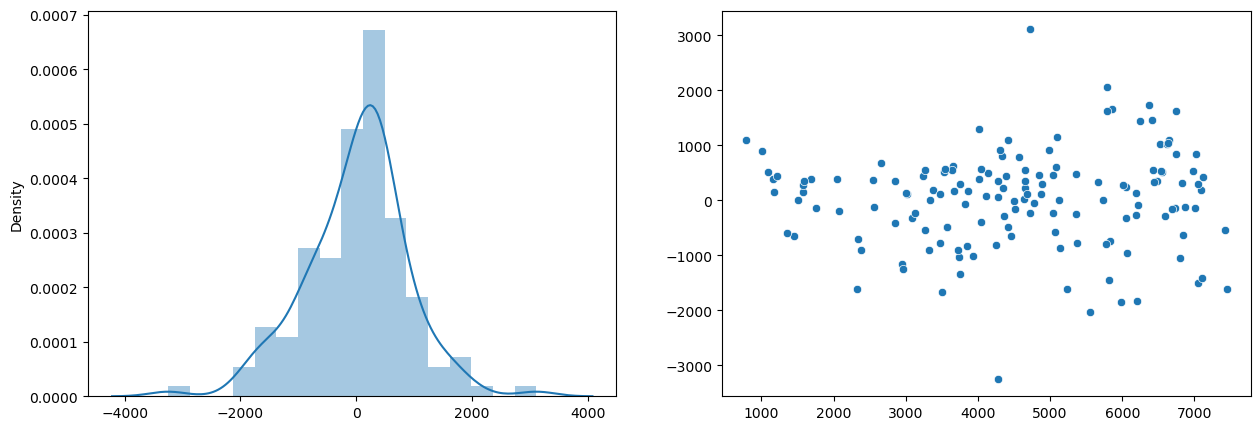

In [267]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.distplot(res)
##maximum of my errors are near/ in between 0 so that means my model is actually learning
plt.subplot(1,2,2)
sns.scatterplot(x = y_test_pred, y = res)
##maximum of my errors are lying in between 1000 and -1000

In [268]:
## accuracy of the model
r2_score(y_pred=y_test_pred, y_true=y_test)

0.7989095426336728